In [1]:
# Jalankan perintah di bawah jika notebook dijalankan di Google Colab
## install python 3.9
!sudo apt-get update -y
!sudo apt-get install python3.9

## change alternatives
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.7 1
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.9 2

# #check python version
!python --version

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:8 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [91.7 kB]
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:13 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease [15.9 kB]
Hit:14 http:

# Memprediksi *Customer Churn*

`Faisal Kengo (FTDS Remote Batch 014)`

## Perkenalan

Nama saya Faisal Kengo, kali ini saya akan memprediksi *customer churn* dari pelayanan telekomunikasi yang disediakan dengan menggunakan algoritma *Artificial Neural Network*. *Dataset* yang disediakan berisi tentang deskripsi perilaku pelanggan pelayanan telekomunikasi, mulai dari identitas diri, pelayanan apa saja yang digunakan, hingga biaya yang dikeluarkan untuk pelayanan yang digunakan.

### Tujuan

Tujuan dari penyusunan laporan ini adalah sebagai berikut:

* Memprediksi klasifikasi dari `Churn` dari dataset yang diambil dengan menggunakan algoritma *Artificial Neural Network*.

## Pengolahan dan Analisa *Dataset*

### Mengimpor *Library*

Pertama-tama kita akan mengimpor *library* yang akan kita gunakan untuk mengolah data.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import pickle
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer

### Memuat *Dataset*

Setelah kita memuat *library* yang akan kita gunakan, kita akan muat *dataset* yang sudah kita unduh.

In [3]:
# Load data dari dataset yang sudah diuplaod ke Google Colab
df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")

Lalu kita akan tampilkan bagian awal dari *dataset* tersebut.

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Tak lupa kita tampilkan bagian akhir dari *dataset* tersebut.

In [5]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


### *Exploratory Data Analysis*

Pertama-tama kita akan melihat terlebih dahulu bagaimana data-data yang kita miliki di dalam *dataset* yang sudah dimuat dengan perintah `.info()`:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Dari perintah di atas, kita dapat mengetahui bahwa *dataset* yang akan kita gunakan mengandung 7043 data yang tersusun dari 21 kolom yang berbeda. Namun pada *dataset* ini terdapat suatu keanehan, yaitu kolom `TotalCharges` yang memiliki tipe data `object` alih-alih tipe data `float64`. Kita akan lihat terlebih dahulu data pada kolom `TotalCharges`.

In [7]:
df.TotalCharges

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

Tidak terlihat adanya keanehan pada data di atas, jadi kemungkinan besarnya, ada nilai yang hilang namun diganti menjadi karakter lain. Kita akan ubah nilai tersebut menjadi nilai `null` dan mengubah tipe data kolom `TotalCharges` menjadi `float`

In [8]:
df["TotalCharges"] = df["TotalCharges"].replace(" ", np.nan).astype("float")

In [9]:
df[["customerID", "gender", "Partner", "Dependents", "PhoneService", "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "Contract", "PaperlessBilling", "PaymentMethod", "Churn"]] = df[["customerID", "gender", "Partner", "Dependents", "PhoneService", "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "Contract", "PaperlessBilling", "PaymentMethod", "Churn"]].astype("string")

Kemudian kita akan periksa kembali deskripsi data yang kita miliki.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   string 
 1   gender            7043 non-null   string 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   string 
 4   Dependents        7043 non-null   string 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   string 
 7   MultipleLines     7043 non-null   string 
 8   InternetService   7043 non-null   string 
 9   OnlineSecurity    7043 non-null   string 
 10  OnlineBackup      7043 non-null   string 
 11  DeviceProtection  7043 non-null   string 
 12  TechSupport       7043 non-null   string 
 13  StreamingTV       7043 non-null   string 
 14  StreamingMovies   7043 non-null   string 
 15  Contract          7043 non-null   string 
 16  PaperlessBilling  7043 non-null   string 


Dari deskripsi data, kita ketahui bahwa *dataset* terdiri dari 17 buah kolom yang memiliki tipe data `string` dan 4 buah kolom yang memiliki tipe data `int` dan `float`.

Kemudian kita akan melihat bagaimana persebaran data matematis dari *dataset* yang kita miliki.

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.000,0.0000,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.000,55.0000,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.350,89.8500,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.45,1397.475,3794.7375,8684.80


Dari eksekusi perintah di atas kita dapat menyimpulkan beberapa hal berikut:

* Kolom `SeniorCitizen` merupakan kolom kategorik yang sudah diberlakukan *encoding*,

* Masa aktif pelayanan tercatat berada pada rentang 0 sampai dengan 72 bulan, dengan rata-rata masa aktif pelayanan selama sekitar 32 bulan,

* Tagihan bulanan tercatat pada rentang 18.25 hingga 118.75 dengan rata-rata tagihan bulanan sebesar 64.76,

* Tagihan keseluruhan tercatat pada rentang 18.8 hingga 8684.8 dengan rata-rata tagihan keseluruhan sebesar 2283.3

Kemudian kita akan buat visualisasi untuk melihat persebaran data dari setiap kolom yang kita miliki. Pertama-tama kita akan lihat bagaimana persebaran jenis kelamin pelanggan.

In [12]:
df.gender.value_counts().sort_index()

Female    3488
Male      3555
Name: gender, dtype: Int64

Kemudian kita akan buat visualisasinya dengan menggunakan grafik batang vertikal.

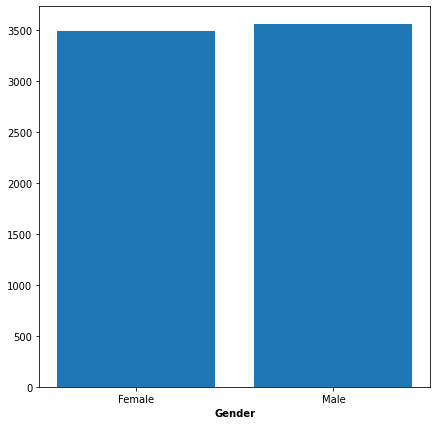

In [13]:
plt.figure(figsize = (7, 7))

height = df.gender.value_counts().sort_index()

bars = (df.gender.value_counts().sort_index().index)
x_pos = np.arange(len(bars))

plt.bar(x_pos, height)
plt.xticks(x_pos, bars)
plt.xlabel("Gender", fontweight = "bold")

plt.show()

Dari grafik tersebut kita dapat melihat bahwa jumlah pelanggan wanita dan pria kurang-lebih sama banyaknya.

Kemudian kita akan melihat data klasifikasi pelanggan senior.

In [14]:
df.SeniorCitizen.value_counts().sort_index()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

Kemudian kita akan buat visualisasinya dengan menggunakan grafik batang vertikal.

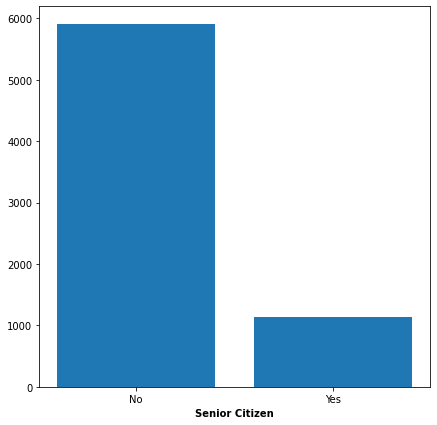

In [15]:
plt.figure(figsize = (7, 7))

height = df.SeniorCitizen.value_counts().sort_index()

bars = ("No", "Yes")
x_pos = np.arange(len(bars))

plt.bar(x_pos, height)
plt.xticks(x_pos, bars)
plt.xlabel("Senior Citizen", fontweight = "bold")

plt.show()

Dari grafik tersebut kita dapat melihat bahwa jumlah pelanggan senior jauh lebih sedikit dari jumlah keseluruhan pelanggan.

Kemudian kita akan melihat data klasifikasi pasangan.

In [16]:
df.Partner.value_counts().sort_index()

No     3641
Yes    3402
Name: Partner, dtype: Int64

Kemudian kita akan buat visualisasinya dengan menggunakan grafik batang vertikal.

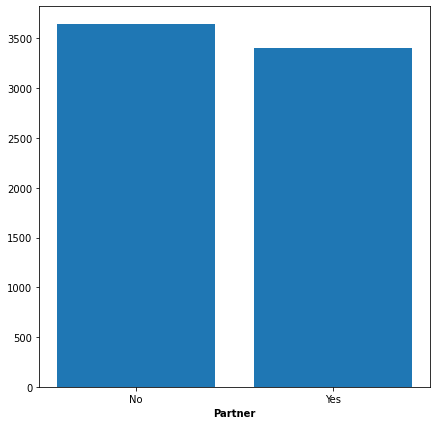

In [17]:
plt.figure(figsize = (7, 7))

height = df.Partner.value_counts().sort_index()

bars = (df.Partner.value_counts().sort_index().index)
x_pos = np.arange(len(bars))

plt.bar(x_pos, height)
plt.xticks(x_pos, bars)
plt.xlabel("Partner", fontweight = "bold")

plt.show()

Dari grafik tersebut kita dapat melihat bahwa jumlah pelanggan yang tidak memiliki pasangan sedikit lebih banyak dari pelanggan yang memiliki pasangan.

Kemudian kita akan melihat data klasifikasi dependensi pelanggan.

In [18]:
df.Dependents.value_counts().sort_index()

No     4933
Yes    2110
Name: Dependents, dtype: Int64

Kemudian kita akan buat visualisasinya dengan menggunakan grafik batang vertikal.

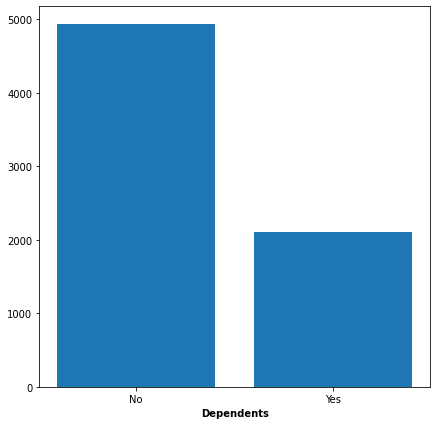

In [19]:
plt.figure(figsize = (7, 7))

height = df.Dependents.value_counts().sort_index()

bars = (df.Dependents.value_counts().sort_index().index)
x_pos = np.arange(len(bars))

plt.bar(x_pos, height)
plt.xticks(x_pos, bars)
plt.xlabel("Dependents", fontweight = "bold")

plt.show()

Dari grafik tersebut kita dapat melihat bahwa mayoritas pelanggan sudah mandiri secara ekonomi.

Kemudian kita akan melihat grafik distribusi masa aktif layanan.

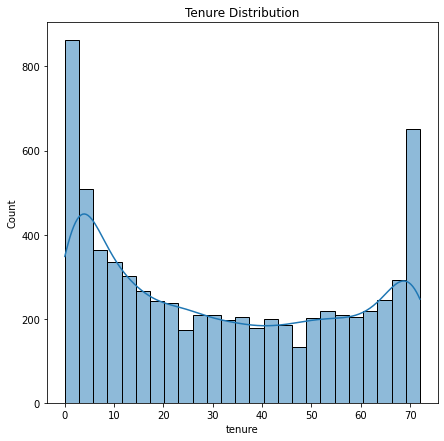

In [20]:
plt.figure(figsize = (7, 7))

sns.histplot(df.tenure, bins = 25, kde = True)
plt.title("Tenure Distribution")

plt.show()

Dari grafik tersebut kita dapat melihat bahwa mayoritas pelanggan yang tercatat merupakan pelanggan tetap yang sudah sangat lama menggunakan pelayanan dan juga pelanggan baru.

Kemudian kita akan melihat data klasifikasi penggunaan layanan telepon.

In [21]:
df.PhoneService.value_counts().sort_index()

No      682
Yes    6361
Name: PhoneService, dtype: Int64

Kemudian kita akan buat visualisasinya dengan menggunakan grafik batang vertikal.

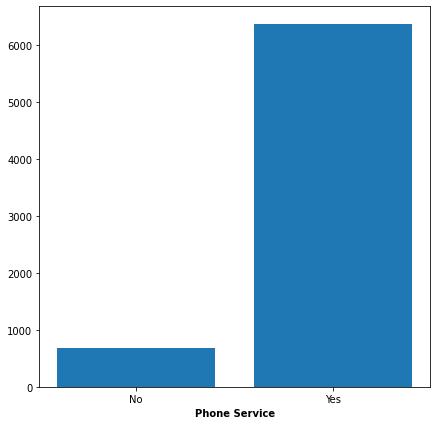

In [22]:
plt.figure(figsize = (7, 7))

height = df.PhoneService.value_counts().sort_index()

bars = (df.PhoneService.value_counts().sort_index().index)
x_pos = np.arange(len(bars))

plt.bar(x_pos, height)
plt.xticks(x_pos, bars)
plt.xlabel("Phone Service", fontweight = "bold")

plt.show()

Dari grafik tersebut kita dapat melihat bahwa mayoritas pelanggan menggunakan pelayanan telepon.

Kemudian kita akan melihat data pelanggan dengan jumlah jaringan telepon lebih dari satu.

In [23]:
df.MultipleLines.value_counts().sort_index()

No                  3390
No phone service     682
Yes                 2971
Name: MultipleLines, dtype: Int64

Kemudian kita akan buat visualisasinya dengan menggunakan grafik batang vertikal.

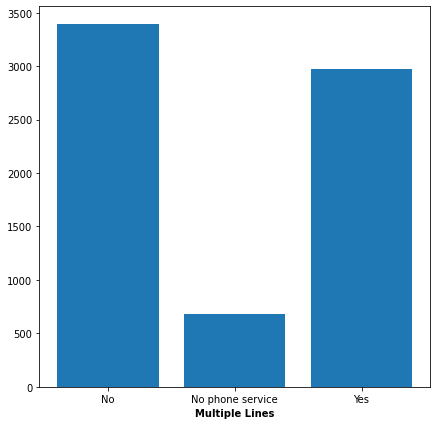

In [24]:
plt.figure(figsize = (7, 7))

height = df.MultipleLines.value_counts().sort_index()

bars = (df.MultipleLines.value_counts().sort_index().index)
x_pos = np.arange(len(bars))

plt.bar(x_pos, height)
plt.xticks(x_pos, bars)
plt.xlabel("Multiple Lines", fontweight = "bold")

plt.show()

Dari grafik tersebut kita dapat melihat bahwa lebih banyak pelanggan yang hanya memiliki satu jaringan telepon dibandingkan dengan pelanggan yang memiliki lebih dari satu jaringan telepon.

Kemudian kita akan melihat data pelanggan dengan pelayanan jaringan internet.

In [25]:
df.InternetService.value_counts().sort_index()

DSL            2421
Fiber optic    3096
No             1526
Name: InternetService, dtype: Int64

Kemudian kita akan buat visualisasinya dengan menggunakan grafik batang vertikal.

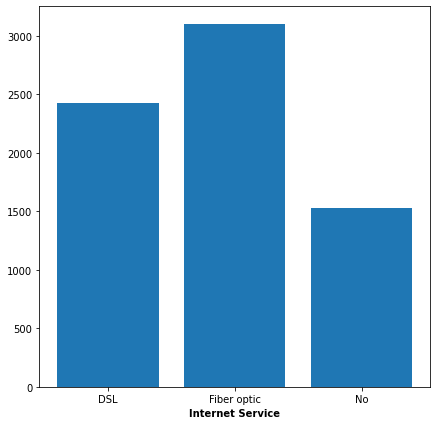

In [26]:
plt.figure(figsize = (7, 7))

height = df.InternetService.value_counts().sort_index()

bars = (df.InternetService.value_counts().sort_index().index)
x_pos = np.arange(len(bars))

plt.bar(x_pos, height)
plt.xticks(x_pos, bars)
plt.xlabel("Internet Service", fontweight = "bold")

plt.show()

Dari grafik tersebut kita dapat melihat bahwa lebih banyak pelanggan menggunakan pelayanan internet berbasis *fiber optic*.

Kemudian kita akan melihat data pelanggan dengan pelayanan pengamanan daring.

In [27]:
df.OnlineSecurity.value_counts().sort_index()

No                     3498
No internet service    1526
Yes                    2019
Name: OnlineSecurity, dtype: Int64

Kemudian kita akan buat visualisasinya dengan menggunakan grafik batang vertikal.

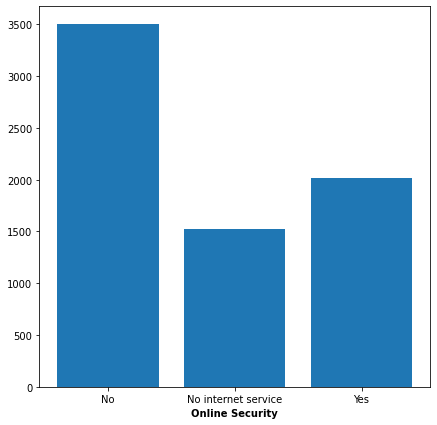

In [28]:
plt.figure(figsize = (7, 7))

height = df.OnlineSecurity.value_counts().sort_index()

bars = (df.OnlineSecurity.value_counts().sort_index().index)
x_pos = np.arange(len(bars))

plt.bar(x_pos, height)
plt.xticks(x_pos, bars)
plt.xlabel("Online Security", fontweight = "bold")

plt.show()

Dari grafik tersebut kita dapat melihat bahwa lebih banyak pelanggan tidak menggunakan pelayanan pengamanan daring.

Kemudian kita akan melihat data pelanggan dengan pelayanan cadangan daring.

In [29]:
df.OnlineBackup.value_counts().sort_index()

No                     3088
No internet service    1526
Yes                    2429
Name: OnlineBackup, dtype: Int64

Kemudian kita akan buat visualisasinya dengan menggunakan grafik batang vertikal.

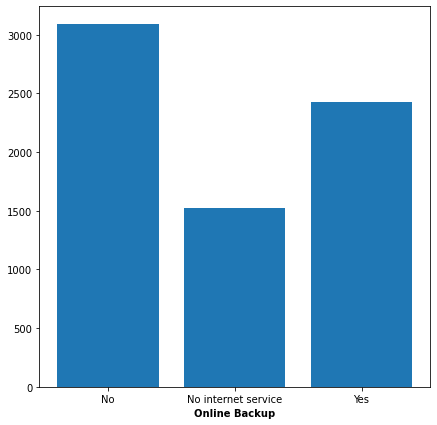

In [30]:
plt.figure(figsize = (7, 7))

height = df.OnlineBackup.value_counts().sort_index()

bars = (df.OnlineBackup.value_counts().sort_index().index)
x_pos = np.arange(len(bars))

plt.bar(x_pos, height)
plt.xticks(x_pos, bars)
plt.xlabel("Online Backup", fontweight = "bold")

plt.show()

Dari grafik tersebut kita dapat melihat bahwa lebih banyak pelanggan tidak menggunakan pelayanan cadangan daring.

Kemudian kita akan melihat data pelanggan dengan pelayanan pengamanan perangkat.

In [31]:
df.DeviceProtection.value_counts().sort_index()

No                     3095
No internet service    1526
Yes                    2422
Name: DeviceProtection, dtype: Int64

Kemudian kita akan buat visualisasinya dengan menggunakan grafik batang vertikal.

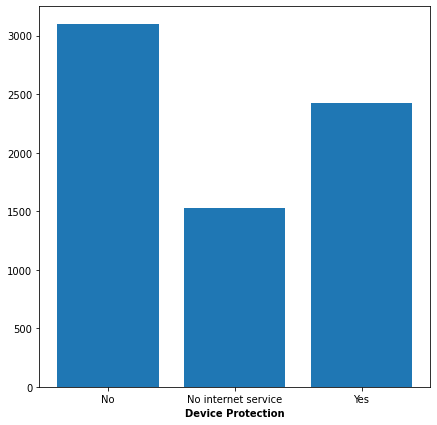

In [32]:
plt.figure(figsize = (7, 7))

height = df.DeviceProtection.value_counts().sort_index()

bars = (df.DeviceProtection.value_counts().sort_index().index)
x_pos = np.arange(len(bars))

plt.bar(x_pos, height)
plt.xticks(x_pos, bars)
plt.xlabel("Device Protection", fontweight = "bold")

plt.show()

Dari grafik tersebut kita dapat melihat bahwa lebih banyak pelanggan tidak menggunakan pelayanan pengamanan perangkat.

Kemudian kita akan melihat data pelanggan dengan pelayanan *tech support*.

In [33]:
df.TechSupport.value_counts().sort_index()

No                     3473
No internet service    1526
Yes                    2044
Name: TechSupport, dtype: Int64

Kemudian kita akan buat visualisasinya dengan menggunakan grafik batang vertikal.

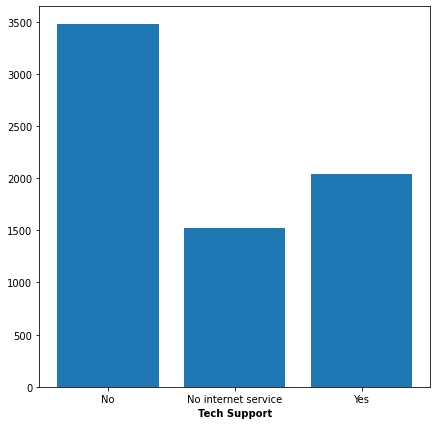

In [34]:
plt.figure(figsize = (7, 7))

height = df.TechSupport.value_counts().sort_index()

bars = (df.TechSupport.value_counts().sort_index().index)
x_pos = np.arange(len(bars))

plt.bar(x_pos, height)
plt.xticks(x_pos, bars)
plt.xlabel("Tech Support", fontweight = "bold")

plt.show()

Dari grafik tersebut kita dapat melihat bahwa lebih banyak pelanggan tidak menggunakan pelayanan *tech support*.

Kemudian kita akan melihat data pelanggan dengan pelayanan *streaming* televisi.

In [35]:
df.StreamingTV.value_counts().sort_index()

No                     2810
No internet service    1526
Yes                    2707
Name: StreamingTV, dtype: Int64

Kemudian kita akan buat visualisasinya dengan menggunakan grafik batang vertikal.

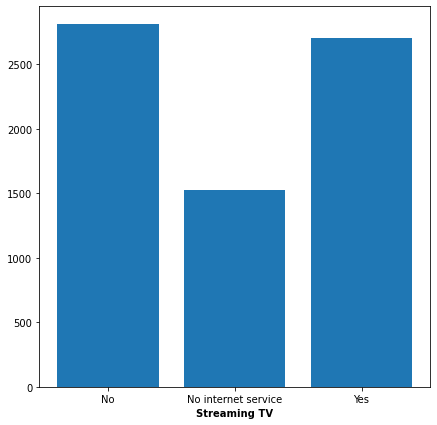

In [36]:
plt.figure(figsize = (7, 7))

height = df.StreamingTV.value_counts().sort_index()

bars = (df.StreamingTV.value_counts().sort_index().index)
x_pos = np.arange(len(bars))

plt.bar(x_pos, height)
plt.xticks(x_pos, bars)
plt.xlabel("Streaming TV", fontweight = "bold")

plt.show()

Dari grafik tersebut kita dapat melihat bahwa kurang lebih jumlah pelanggan yang berlangganan layanan *streaming* televisi sama dengan yang tidak berlangganan layanan tersebut.

Kemudian kita akan melihat data pelanggan dengan pelayanan *streaming* film.

In [37]:
df.StreamingMovies.value_counts().sort_index()

No                     2785
No internet service    1526
Yes                    2732
Name: StreamingMovies, dtype: Int64

Kemudian kita akan buat visualisasinya dengan menggunakan grafik batang vertikal.

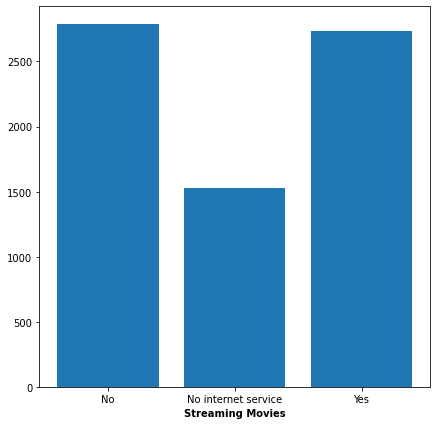

In [38]:
plt.figure(figsize = (7, 7))

height = df.StreamingMovies.value_counts().sort_index()

bars = (df.StreamingMovies.value_counts().sort_index().index)
x_pos = np.arange(len(bars))

plt.bar(x_pos, height)
plt.xticks(x_pos, bars)
plt.xlabel("Streaming Movies", fontweight = "bold")

plt.show()

Dari grafik tersebut kita dapat melihat bahwa kurang lebih jumlah pelanggan yang berlangganan layanan *streaming* film sama dengan yang tidak berlangganan layanan tersebut.

Kemudian kita akan melihat data jenis pembaruan kontrak yang dilakukan oleh pelanggan.

In [39]:
df.Contract.value_counts().sort_index()

Month-to-month    3875
One year          1473
Two year          1695
Name: Contract, dtype: Int64

Kemudian kita akan buat visualisasinya dengan menggunakan grafik batang vertikal.

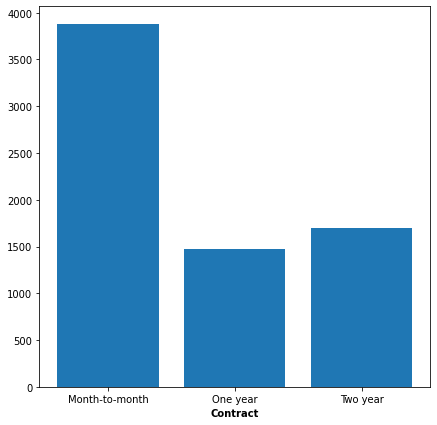

In [40]:
plt.figure(figsize = (7, 7))

height = df.Contract.value_counts().sort_index()

bars = (df.Contract.value_counts().sort_index().index)
x_pos = np.arange(len(bars))

plt.bar(x_pos, height)
plt.xticks(x_pos, bars)
plt.xlabel("Contract", fontweight = "bold")

plt.show()

Dari grafik tersebut kita dapat melihat bahwa mayoritas pelanggan melakukan pembaruan kontrak dalam basis bulanan.

Kemudian kita akan melihat data pelanggan yang menerima tagihan kertas.

In [41]:
df.PaperlessBilling.value_counts().sort_index()

No     2872
Yes    4171
Name: PaperlessBilling, dtype: Int64

Kemudian kita akan buat visualisasinya dengan menggunakan grafik batang vertikal.

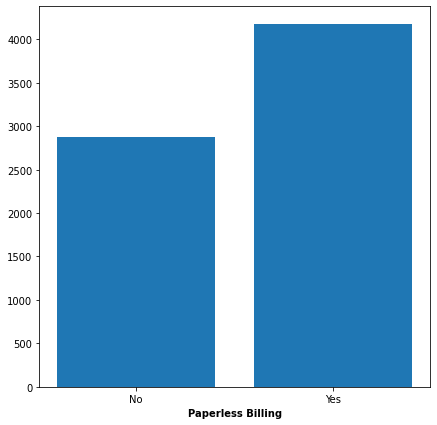

In [42]:
plt.figure(figsize = (7, 7))

height = df.PaperlessBilling.value_counts().sort_index()

bars = (df.PaperlessBilling.value_counts().sort_index().index)
x_pos = np.arange(len(bars))

plt.bar(x_pos, height)
plt.xticks(x_pos, bars)
plt.xlabel("Paperless Billing", fontweight = "bold")

plt.show()

Dari grafik tersebut kita dapat melihat bahwa mayoritas pelanggan melakukan pembayaran tanpa tagihan kertas.

Kemudian kita akan melihat data jenis pembayaran yang dilakukan oleh pelanggan.

In [43]:
df.PaymentMethod.value_counts().sort_index()

Bank transfer (automatic)    1544
Credit card (automatic)      1522
Electronic check             2365
Mailed check                 1612
Name: PaymentMethod, dtype: Int64

Kemudian kita akan buat visualisasinya dengan menggunakan grafik batang vertikal.

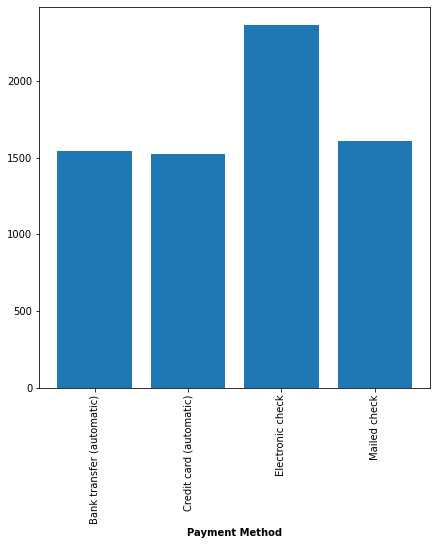

In [44]:
plt.figure(figsize = (7, 7))

height = df.PaymentMethod.value_counts().sort_index()

bars = (df.PaymentMethod.value_counts().sort_index().index)
x_pos = np.arange(len(bars))

plt.bar(x_pos, height)
plt.xticks(x_pos, bars, rotation = 90)
plt.xlabel("Payment Method", fontweight = "bold")

plt.show()

Dari grafik tersebut kita dapat melihat bahwa mayoritas pelanggan melakukan pembayaran melalui cek elektronik.

Kemudian kita akan melihat distribusi tagihan bulanan tiap pelanggan.

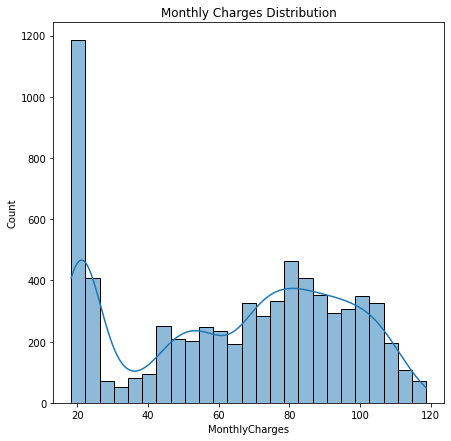

In [45]:
plt.figure(figsize = (7, 7))

sns.histplot(df.MonthlyCharges, bins = 25, kde = True)
plt.title("Monthly Charges Distribution")

plt.show()

Dari grafik tersebut kita dapat melihat bahwa mayoritas pelanggan memiliki tagihan bulanan sekitar 20 atau sekitar 80.

Kemudian kita akan melihat distribusi tagihan keseluruhan tiap pelanggan.

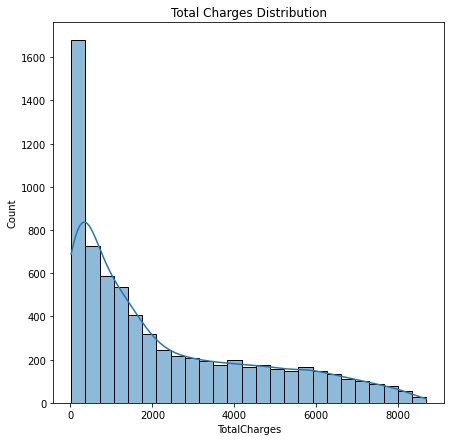

In [46]:
plt.figure(figsize = (7, 7))

sns.histplot(df.TotalCharges, bins = 25, kde = True)
plt.title("Total Charges Distribution")

plt.show()

Dari grafik tersebut kita dapat melihat bahwa tagihan keseluruhan yang dibayarkan oleh pelanggan mayoritas berada di rentang 0-2000.

Kemudian kita akan melihat data pelanggan yang memutus kontrak pelayanan.

In [47]:
df.Churn.value_counts().sort_index()

No     5174
Yes    1869
Name: Churn, dtype: Int64

Kemudian kita akan buat visualisasinya dengan menggunakan grafik batang vertikal.

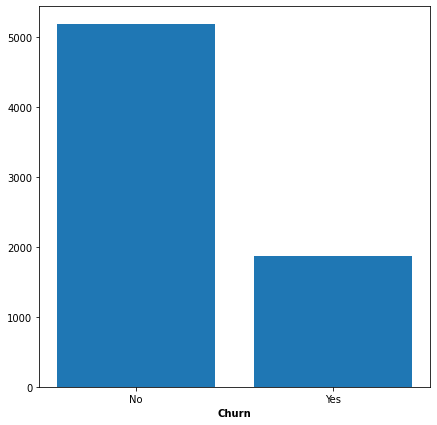

In [48]:
plt.figure(figsize = (7, 7))

height = df.Churn.value_counts().sort_index()

bars = (df.Churn.value_counts().sort_index().index)
x_pos = np.arange(len(bars))

plt.bar(x_pos, height)
plt.xticks(x_pos, bars)
plt.xlabel("Churn", fontweight = "bold")

plt.show()

Dari grafik tersebut kita dapat melihat bahwa mayoritas pelanggan masih menggunakan layanan telekomunikasi yang disediakan. Namun, jumlah pelanggan yang memutus layanan juga bisa dibilang cukup banyak.

## *Data Preprocessing*

### Mengambil dan Memisahkan *Data Inference*

Sebelum kita membagi *dataset train* dan *dataset test*, kita pisahkan dulu beberapa buah data untuk kita lakukan *inferencing* nantinya.

In [49]:
df_inf = df.sample(10, random_state = 13)
df_inf

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
416,4686-GEFRM,Male,0,Yes,No,70,Yes,Yes,Fiber optic,No,...,Yes,Yes,No,Yes,Two year,Yes,Bank transfer (automatic),98.70,6858.90,No
4521,8671-KKKOS,Female,0,Yes,No,46,No,No phone service,DSL,Yes,...,No,No,Yes,No,Month-to-month,No,Electronic check,45.55,2062.15,No
4213,3683-QKIUE,Female,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Bank transfer (automatic),50.80,288.05,Yes
1580,7108-DGVUU,Female,1,Yes,No,21,Yes,Yes,DSL,No,...,Yes,No,No,Yes,One year,No,Bank transfer (automatic),71.70,1497.05,No
2226,3298-QEICA,Female,0,Yes,Yes,23,No,No phone service,DSL,Yes,...,No,Yes,No,No,Two year,No,Mailed check,34.60,813.45,No
2273,0219-QAERP,Male,0,Yes,No,30,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),19.80,576.65,No
1627,5035-BVCXS,Male,0,No,No,11,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,75.90,866.40,No
1070,6166-ILMNY,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,No,Bank transfer (automatic),69.75,144.55,Yes
4182,4902-OHLSK,Female,1,No,No,29,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Yes,Month-to-month,No,Electronic check,98.65,2862.75,Yes
1755,1803-BGNBD,Female,0,No,No,12,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Electronic check,54.30,654.50,No


Kemudian kita pisahkan sampel data tadi dari *dataset* aslinya.

In [50]:
df_traindevtest = df.drop(df_inf.index)
df_traindevtest.reset_index(drop = True, inplace = True)
df_inf.reset_index(drop = True, inplace = True)

### Memisahkan *Data Train*, *Data Dev*, dan *Data Test*

Setelah kita memisahkan *dataset inference* dengan *dataset* aslinya, kita pisahkan lebih lanjut *dataset* yang sudah dipisahkan menjadi tabel fitur dan tabel target. Pada kasus ini target yang dipilih adalah kolom `Churn`.

In [51]:
x = df_traindevtest.drop("Churn", axis = 1)
y = df_traindevtest["Churn"]

Karena algoritma *neural network* tidak dapat mengenali keluaran berbentuk `string`, kita akan lakukan *encoding* terhadap kolom targetnya.

In [52]:
label_encoder = LabelEncoder()
label_encoder.fit(y)

y_trans = pd.DataFrame(label_encoder.transform(y), columns = ["y_trans"])

Kemudian dengan bantuan *library* `sklearn.model_selection.train_test_split`, kita akan memisahkan tabel fitur dan target menjadi *dataset train*, *dataset dev* dan *dataset test*.

Pertama-tama kita akan pisahkan *dataset train* sebanyak 70% dari *dataset* aslinya.

In [53]:
x_train, x_devtest, y_train, y_devtest = train_test_split(x, y_trans, test_size = 0.3, random_state = 13)

x_train.reset_index(drop = True, inplace = True)
x_devtest.reset_index(drop = True, inplace = True)
y_train.reset_index(drop = True, inplace = True)
y_devtest.reset_index(drop = True, inplace = True)

Kemudian kita akan pisahkan *dataset dev* dan *dataset test* dengan rasio 2:1.

In [54]:
x_dev, x_test, y_dev, y_test = train_test_split(x_devtest, y_devtest, test_size = 0.33, random_state = 13)

x_dev.reset_index(drop = True, inplace = True)
x_test.reset_index(drop = True, inplace = True)
y_dev.reset_index(drop = True, inplace = True)
y_test.reset_index(drop = True, inplace = True)

Kemudian kita akan periksa dimensi data yang akan diolah.

In [55]:
print("Train Size:", x_train.shape)
print("Dev Size:", x_dev.shape)
print("Test Size:", x_test.shape)

Train Size: (4923, 20)
Dev Size: (1413, 20)
Test Size: (697, 20)


Dari kedua proses di atas kita mendapatkan *dataset train*, *dataset dev*, dan *dataset test* dengan rasio 7:2:1.

### Pemecahan Kolom

Berdasarkan *exploratory data analysis* yang sudah dilakukan sebelumnya, kita dapat memisahkan satu tabel menjadi banyak kolom bertipe boolean untuk mempermudah proses *encoding* nantinya.

In [56]:
phone_serv_bool = []
single_line_bool = []
multi_line_bool = []
internet_serv_bool = []
DSL_serv_bool = []
optic_serv_bool = []
olsecurity_serv_bool = []
olbackup_serv_bool = []
devprotect_serv_bool = []
techsupport_serv_bool = []
tv_serv_bool = []
movies_serv_bool = []

for i in range(len(x_train)):
  if "Yes" in x_train.PhoneService.iloc[i]:
    phoneserv_id = True
  else:
    phoneserv_id = False
  phone_serv_bool.append(phoneserv_id)

for i in range(len(x_train)):
  if "Yes" in x_train.MultipleLines.iloc[i]:
    singleline_id = True
  else:
    singleline_id = False
  single_line_bool.append(singleline_id)

for i in range(len(x_train)):
  if "Yes" in x_train.MultipleLines.iloc[i]:
    multiline_id = True
  else:
    multiline_id = False
  multi_line_bool.append(multiline_id)

for i in range(len(x_train)):
  if "No" in x_train.InternetService.iloc[i]:
    netserv_id = True
  else:
    netserv_id = False
  internet_serv_bool.append(netserv_id)

for i in range(len(x_train)):
  if "DSL" in x_train.InternetService.iloc[i]:
    dslserv_id = True
  else:
    dslserv_id = False
  DSL_serv_bool.append(dslserv_id)

for i in range(len(x_train)):
  if "Fiber optic" in x_train.InternetService.iloc[i]:
    opticserv_id = True
  else:
    opticserv_id = False
  optic_serv_bool.append(opticserv_id)

for i in range(len(x_train)):
  if "Yes" in x_train.OnlineSecurity.iloc[i]:
    olsec_id = True
  else:
    olsec_id = False
  olsecurity_serv_bool.append(olsec_id)

for i in range(len(x_train)):
  if "Yes" in x_train.OnlineBackup.iloc[i]:
    olback_id = True
  else:
    olback_id = False
  olbackup_serv_bool.append(olback_id)

for i in range(len(x_train)):
  if "Yes" in x_train.DeviceProtection.iloc[i]:
    devprot_id = True
  else:
    devprot_id = False
  devprotect_serv_bool.append(devprot_id)

for i in range(len(x_train)):
  if "Yes" in x_train.TechSupport.iloc[i]:
    techsupp_id = True
  else:
    techsupp_id = False
  techsupport_serv_bool.append(techsupp_id)

for i in range(len(x_train)):
  if "Yes" in x_train.StreamingTV.iloc[i]:
    tv_id = True
  else:
    tv_id = False
  tv_serv_bool.append(tv_id)

for i in range(len(x_train)):
  if "Yes" in x_train.StreamingMovies.iloc[i]:
    movies_id = True
  else:
    movies_id = False
  movies_serv_bool.append(movies_id)

x_train["PhoneUser"] = phone_serv_bool
x_train["SingleLineUser"] = single_line_bool
x_train["MultiLineUser"] = multi_line_bool
x_train["InternetUser"] = internet_serv_bool
x_train["DSLUser"] = DSL_serv_bool
x_train["FiberOpticUser"] = optic_serv_bool
x_train["OnlineSecurityUser"] = olsecurity_serv_bool
x_train["OnlineBackupUser"] = olbackup_serv_bool
x_train["DeviceProtectionUser"] = devprotect_serv_bool
x_train["TechSupportUser"] = techsupport_serv_bool
x_train["TVStreamUser"] = tv_serv_bool
x_train["MoviesStreamUser"] = movies_serv_bool

Jangan lupa kita lakukan juga *loop* di atas terhadap *dataset test*.

In [57]:
phone_serv_test_bool = []
single_line_test_bool = []
multi_line_test_bool = []
internet_serv_test_bool = []
DSL_serv_test_bool = []
optic_serv_test_bool = []
olsecurity_serv_test_bool = []
olbackup_serv_test_bool = []
devprotect_serv_test_bool = []
techsupport_serv_test_bool = []
tv_serv_test_bool = []
movies_serv_test_bool = []

for i in range(len(x_test)):
  if "Yes" in x_test.PhoneService.iloc[i]:
    phoneserv_id = True
  else:
    phoneserv_id = False
  phone_serv_test_bool.append(phoneserv_id)

for i in range(len(x_test)):
  if "Yes" in x_test.MultipleLines.iloc[i]:
    singleline_id = True
  else:
    singleline_id = False
  single_line_test_bool.append(singleline_id)

for i in range(len(x_test)):
  if "Yes" in x_test.MultipleLines.iloc[i]:
    multiline_id = True
  else:
    multiline_id = False
  multi_line_test_bool.append(multiline_id)

for i in range(len(x_test)):
  if "No" in x_test.InternetService.iloc[i]:
    netserv_id = True
  else:
    netserv_id = False
  internet_serv_test_bool.append(netserv_id)

for i in range(len(x_test)):
  if "DSL" in x_test.InternetService.iloc[i]:
    dslserv_id = True
  else:
    dslserv_id = False
  DSL_serv_test_bool.append(dslserv_id)

for i in range(len(x_test)):
  if "Fiber optic" in x_test.InternetService.iloc[i]:
    opticserv_id = True
  else:
    opticserv_id = False
  optic_serv_test_bool.append(opticserv_id)

for i in range(len(x_test)):
  if "Yes" in x_test.OnlineSecurity.iloc[i]:
    olsec_id = True
  else:
    olsec_id = False
  olsecurity_serv_test_bool.append(olsec_id)

for i in range(len(x_test)):
  if "Yes" in x_test.OnlineBackup.iloc[i]:
    olback_id = True
  else:
    olback_id = False
  olbackup_serv_test_bool.append(olback_id)

for i in range(len(x_test)):
  if "Yes" in x_test.DeviceProtection.iloc[i]:
    devprot_id = True
  else:
    devprot_id = False
  devprotect_serv_test_bool.append(devprot_id)

for i in range(len(x_test)):
  if "Yes" in x_test.TechSupport.iloc[i]:
    techsupp_id = True
  else:
    techsupp_id = False
  techsupport_serv_test_bool.append(techsupp_id)

for i in range(len(x_test)):
  if "Yes" in x_test.StreamingTV.iloc[i]:
    tv_id = True
  else:
    tv_id = False
  tv_serv_test_bool.append(tv_id)

for i in range(len(x_test)):
  if "Yes" in x_test.StreamingMovies.iloc[i]:
    movies_id = True
  else:
    movies_id = False
  movies_serv_test_bool.append(movies_id)

x_test["PhoneUser"] = phone_serv_test_bool
x_test["SingleLineUser"] = single_line_test_bool
x_test["MultiLineUser"] = multi_line_test_bool
x_test["InternetUser"] = internet_serv_test_bool
x_test["DSLUser"] = DSL_serv_test_bool
x_test["FiberOpticUser"] = optic_serv_test_bool
x_test["OnlineSecurityUser"] = olsecurity_serv_test_bool
x_test["OnlineBackupUser"] = olbackup_serv_test_bool
x_test["DeviceProtectionUser"] = devprotect_serv_test_bool
x_test["TechSupportUser"] = techsupport_serv_test_bool
x_test["TVStreamUser"] = tv_serv_test_bool
x_test["MoviesStreamUser"] = movies_serv_test_bool

Dan juga *dataset dev*.

In [58]:
phone_serv_dev_bool = []
single_line_dev_bool = []
multi_line_dev_bool = []
internet_serv_dev_bool = []
DSL_serv_dev_bool = []
optic_serv_dev_bool = []
olsecurity_serv_dev_bool = []
olbackup_serv_dev_bool = []
devprotect_serv_dev_bool = []
techsupport_serv_dev_bool = []
tv_serv_dev_bool = []
movies_serv_dev_bool = []

for i in range(len(x_dev)):
  if "Yes" in x_dev.PhoneService.iloc[i]:
    phoneserv_id = True
  else:
    phoneserv_id = False
  phone_serv_dev_bool.append(phoneserv_id)

for i in range(len(x_dev)):
  if "Yes" in x_dev.MultipleLines.iloc[i]:
    singleline_id = True
  else:
    singleline_id = False
  single_line_dev_bool.append(singleline_id)

for i in range(len(x_dev)):
  if "Yes" in x_dev.MultipleLines.iloc[i]:
    multiline_id = True
  else:
    multiline_id = False
  multi_line_dev_bool.append(multiline_id)

for i in range(len(x_dev)):
  if "No" in x_dev.InternetService.iloc[i]:
    netserv_id = True
  else:
    netserv_id = False
  internet_serv_dev_bool.append(netserv_id)

for i in range(len(x_dev)):
  if "DSL" in x_dev.InternetService.iloc[i]:
    dslserv_id = True
  else:
    dslserv_id = False
  DSL_serv_dev_bool.append(dslserv_id)

for i in range(len(x_dev)):
  if "Fiber optic" in x_dev.InternetService.iloc[i]:
    opticserv_id = True
  else:
    opticserv_id = False
  optic_serv_dev_bool.append(opticserv_id)

for i in range(len(x_dev)):
  if "Yes" in x_dev.OnlineSecurity.iloc[i]:
    olsec_id = True
  else:
    olsec_id = False
  olsecurity_serv_dev_bool.append(olsec_id)

for i in range(len(x_dev)):
  if "Yes" in x_dev.OnlineBackup.iloc[i]:
    olback_id = True
  else:
    olback_id = False
  olbackup_serv_dev_bool.append(olback_id)

for i in range(len(x_dev)):
  if "Yes" in x_dev.DeviceProtection.iloc[i]:
    devprot_id = True
  else:
    devprot_id = False
  devprotect_serv_dev_bool.append(devprot_id)

for i in range(len(x_dev)):
  if "Yes" in x_dev.TechSupport.iloc[i]:
    techsupp_id = True
  else:
    techsupp_id = False
  techsupport_serv_dev_bool.append(techsupp_id)

for i in range(len(x_dev)):
  if "Yes" in x_dev.StreamingTV.iloc[i]:
    tv_id = True
  else:
    tv_id = False
  tv_serv_dev_bool.append(tv_id)

for i in range(len(x_dev)):
  if "Yes" in x_dev.StreamingMovies.iloc[i]:
    movies_id = True
  else:
    movies_id = False
  movies_serv_dev_bool.append(movies_id)

x_dev["PhoneUser"] = phone_serv_dev_bool
x_dev["SingleLineUser"] = single_line_dev_bool
x_dev["MultiLineUser"] = multi_line_dev_bool
x_dev["InternetUser"] = internet_serv_dev_bool
x_dev["DSLUser"] = DSL_serv_dev_bool
x_dev["FiberOpticUser"] = optic_serv_dev_bool
x_dev["OnlineSecurityUser"] = olsecurity_serv_dev_bool
x_dev["OnlineBackupUser"] = olbackup_serv_dev_bool
x_dev["DeviceProtectionUser"] = devprotect_serv_dev_bool
x_dev["TechSupportUser"] = techsupport_serv_dev_bool
x_dev["TVStreamUser"] = tv_serv_dev_bool
x_dev["MoviesStreamUser"] = movies_serv_dev_bool

### Mengurus *Missing Values*

Selain pemecahan kolom, kita akan mengisi *missing value* pada kolom `TotalCharges` dengan menggunakan median-nya.

In [59]:
x_train.TotalCharges = x_train.TotalCharges.fillna(x_train.TotalCharges.median())
x_test.TotalCharges = x_test.TotalCharges.fillna(x_test.TotalCharges.median())
x_dev.TotalCharges = x_dev.TotalCharges.fillna(x_train.TotalCharges.median())

### *Feature Scaling* & *Feature Encoding*

Sebelum kita lakukan *scaling* dan *encoding*, kita akan ambil semua kolom yang sudah kita olah sebelumnya beserta dengan kolom lain yang belum diolah kecuali kolom `customerID`.

In [60]:
x_train = x_train[["gender", "SeniorCitizen", "Partner", "Dependents", "tenure", "PhoneUser","SingleLineUser", "MultiLineUser", "InternetUser", "DSLUser", "FiberOpticUser", "OnlineSecurityUser", "OnlineBackupUser", "DeviceProtectionUser", "TechSupportUser", "TVStreamUser", "MoviesStreamUser", "Contract", "PaperlessBilling", "PaymentMethod", "MonthlyCharges", "TotalCharges"]]
x_test = x_test[["gender", "SeniorCitizen", "Partner", "Dependents", "tenure","PhoneUser","SingleLineUser", "MultiLineUser", "InternetUser", "DSLUser", "FiberOpticUser", "OnlineSecurityUser", "OnlineBackupUser", "DeviceProtectionUser", "TechSupportUser", "TVStreamUser", "MoviesStreamUser", "Contract", "PaperlessBilling", "PaymentMethod", "MonthlyCharges", "TotalCharges"]]

Kemudian kita akan pisahkan kolom-kolom yang telah pilih menjadi kolom numerik, kolom kategorik nominal, dan kolom kategorik ordinal.

In [61]:
num_columns = x_train[["tenure", "MonthlyCharges", "TotalCharges"]].columns.tolist()
ord_columns = x_train[["SeniorCitizen", "Dependents", "PhoneUser","SingleLineUser", "MultiLineUser", "InternetUser", "DSLUser", "FiberOpticUser", "OnlineSecurityUser", "OnlineBackupUser", "DeviceProtectionUser", "TechSupportUser", "TVStreamUser", "MoviesStreamUser"]].columns.tolist()
nom_columns = x_train[["gender", "Partner", "Contract", "PaperlessBilling", "PaymentMethod"]].columns.tolist()

Lalu kita akan lakukan *scaling* dan *encoding* kepada masing-masing kolomnya dengan menggunakan *pipeline*.

In [62]:
preprocess_pipeline = ColumnTransformer([
                      ("num", StandardScaler(), num_columns),
                      ("cat_ord", OrdinalEncoder(), ord_columns),
                      ("cat_nom", OneHotEncoder(), nom_columns)
                      ])

preprocess_data_train = preprocess_pipeline.fit_transform(x_train, y_train)
preprocess_data_test = preprocess_pipeline.transform(x_test)
preprocess_data_dev = preprocess_pipeline.transform(x_dev)

Sebelum kita gunakan *dataset train* yang telah kita olah, kita akan acak *dataset train* dengan bantuan *pipeline* dari `tensorflow`.

In [63]:
tf_dataset_train = tf.data.Dataset.from_tensor_slices((preprocess_data_train, y_train))
tf_dataset_test = tf.data.Dataset.from_tensor_slices((preprocess_data_test, y_test))
tf_dataset_dev = tf.data.Dataset.from_tensor_slices((preprocess_data_dev, y_dev))
tf_dataset_train_batch = tf_dataset_train.batch(16).shuffle(buffer_size = 64)
tf_dataset_test_batch = tf_dataset_test.batch(16)
tf_dataset_dev_batch = tf_dataset_dev.batch(16)

*Dataset train* inilah yang nantinya akan kita masukkan ke dalam model yang akan kita buat.

## *Model Construction*

### *Initial Construction & Evaluation*

Sebelum memulai proses pembangunan model, kita akan pastikan terlebih dahulu bahwa sesi *library* `keras` yang akan gunakan bersih sebelum kita menentukan *seed* dari *library* tersebut.

In [64]:
keras.backend.clear_session()
np.random.seed(13)
tf.random.set_seed(13)

Kemudian kita akan membangun model berbentuk sekuensial. Pada tahap ini kita hanya akan membuat satu *hidden layer* mengingat data yang digunakan jumlahnya tidak terlalu banyak. Selain itu kita akan *compile* model dengan menggunakan *binary crossentropy* sebagai fungsi *loss* karena kita akan melakukan klasifikasi biner dan menggunakan *optimizer* Adam. Keluaran dari perintah *compile* ini akan kita atur menjadi akurasi.

In [65]:
model_sequence = keras.models.Sequential([
    keras.Input(shape = preprocess_data_train.shape[1:], name = "Input"),
    keras.layers.Dense(9, kernel_initializer = keras.initializers.HeNormal(seed = 13), activation = "relu", name = "HL_1"),
    keras.layers.Dense(1, activation = "sigmoid", name = "Output")
])

model_sequence.compile(loss = "binary_crossentropy",
              optimizer = "Adam",
              metrics = ["accuracy"])

model_sequence.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 HL_1 (Dense)                (None, 9)                 279       
                                                                 
 Output (Dense)              (None, 1)                 10        
                                                                 
Total params: 289
Trainable params: 289
Non-trainable params: 0
_________________________________________________________________


Kemudian kita akan latih model yang sudah kita buat.

In [66]:
history_sequence = model_sequence.fit(tf_dataset_train_batch, epochs = 20, validation_data = tf_dataset_dev_batch)

Epoch 1/20
308/308 [==============================] - 2s 3ms/step - loss: 0.5235 - accuracy: 0.7372 - val_loss: 0.4572 - val_accuracy: 0.7870
Epoch 2/20
308/308 [==============================] - 1s 3ms/step - loss: 0.4412 - accuracy: 0.7877 - val_loss: 0.4352 - val_accuracy: 0.7941
Epoch 3/20
308/308 [==============================] - 1s 2ms/step - loss: 0.4271 - accuracy: 0.7981 - val_loss: 0.4293 - val_accuracy: 0.7997
Epoch 4/20
308/308 [==============================] - 1s 3ms/step - loss: 0.4219 - accuracy: 0.7995 - val_loss: 0.4260 - val_accuracy: 0.8018
Epoch 5/20
308/308 [==============================] - 1s 3ms/step - loss: 0.4190 - accuracy: 0.8032 - val_loss: 0.4255 - val_accuracy: 0.7969
Epoch 6/20
308/308 [==============================] - 1s 3ms/step - loss: 0.4171 - accuracy: 0.8052 - val_loss: 0.4242 - val_accuracy: 0.7962
Epoch 7/20
308/308 [==============================] - 1s 3ms/step - loss: 0.4147 - accuracy: 0.8072 - val_loss: 0.4238 - val_accuracy: 0.7983
Epoch 

Lalu kita akan lihat bagaimana perhitungan akurasi keluaran dan akurasi validasi dari model yang sudah dibuat.

In [67]:
metrics_sequence = pd.DataFrame(history_sequence.history)
metrics_sequence.describe()

,loss,accuracy,val_loss,val_accuracy
count,20.000000,20.000000,20.000000,20.000000
mean,0.419296,0.803281,0.426659,0.796497
std,0.025953,0.016655,0.007702,0.003227
min,0.405990,0.737152,0.423146,0.786978
25%,0.408097,0.804692,0.423804,0.795294
50%,0.411397,0.808247,0.424220,0.796178
75%,0.417572,0.810126,0.425554,0.798478
max,0.523493,0.812716,0.457207,0.801840


Dari perintah di atas, kita dapat mengetahui bahwa rata-rata akurasi dari model adalah sebesar 80.32% dengan rata-rata akurasi validasi sebesar 79.65%, serta model memiliki penalti rata-rata sebesar 0.4192 dengan penalti rata-rata validasi sebesar 0.4267. Untuk lebih jelasnya, kita dapat membuat grafik untuk menvisualisasikan akurasi model tersebut.

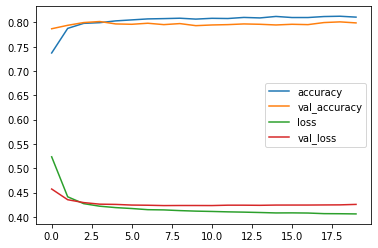

In [68]:
metrics_sequence[["accuracy", "val_accuracy", "loss", "val_loss"]].plot()

Dari grafik di atas, kita dapat lihat bahwa akurasi model umumnya mengalami kenaikan dan penalti dari model terus turun selama pelatihan model.

Selanjutnya kita akan buat model *neural network* berbentuk fungsi. Kita akan buat model dengan parameter yang serupa dengan model sekuensial yang kita buat sebelumnya, namun kali ini kita akan buat dalam bentuk fungsi.

In [69]:
initial_input = keras.Input(shape = preprocess_data_train.shape[1:], name = "Input")
hidden_1 = keras.layers.Dense(9, kernel_initializer = keras.initializers.HeNormal(seed = 13), activation = "relu", name = "HL_1")(initial_input)
final_output = keras.layers.Dense(1, activation = "sigmoid", name = "Output")(hidden_1)
model_function = keras.models.Model(inputs = [initial_input], outputs = [final_output])

model_function.compile(loss = "binary_crossentropy",
              optimizer = "Adam",
              metrics = ["accuracy"])

model_function.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 30)]              0         
                                                                 
 HL_1 (Dense)                (None, 9)                 279       
                                                                 
 Output (Dense)              (None, 1)                 10        
                                                                 
Total params: 289
Trainable params: 289
Non-trainable params: 0
_________________________________________________________________


Kemudian kita akan latih model yang sudah kita buat.

In [70]:
history_function = model_function.fit(tf_dataset_train_batch, epochs = 20, validation_data = tf_dataset_dev_batch)

Epoch 1/20
308/308 [==============================] - 1s 3ms/step - loss: 0.5242 - accuracy: 0.7321 - val_loss: 0.4484 - val_accuracy: 0.7941
Epoch 2/20
308/308 [==============================] - 1s 2ms/step - loss: 0.4347 - accuracy: 0.7948 - val_loss: 0.4248 - val_accuracy: 0.7983
Epoch 3/20
308/308 [==============================] - 1s 2ms/step - loss: 0.4225 - accuracy: 0.7997 - val_loss: 0.4210 - val_accuracy: 0.7997
Epoch 4/20
308/308 [==============================] - 1s 2ms/step - loss: 0.4192 - accuracy: 0.8013 - val_loss: 0.4193 - val_accuracy: 0.8040
Epoch 5/20
308/308 [==============================] - 1s 2ms/step - loss: 0.4171 - accuracy: 0.8034 - val_loss: 0.4191 - val_accuracy: 0.8068
Epoch 6/20
308/308 [==============================] - 1s 2ms/step - loss: 0.4147 - accuracy: 0.8068 - val_loss: 0.4182 - val_accuracy: 0.8033
Epoch 7/20
308/308 [==============================] - 1s 2ms/step - loss: 0.4134 - accuracy: 0.8095 - val_loss: 0.4185 - val_accuracy: 0.8054
Epoch 

Lalu kita akan lihat bagaimana perhitungan akurasi keluaran dan akurasi validasi dari model yang sudah dibuat.

In [71]:
metrics_function = pd.DataFrame(history_function.history)
metrics_function.describe()

,loss,accuracy,val_loss,val_accuracy
count,20.000000,20.000000,20.000000,20.000000
mean,0.418533,0.803849,0.420684,0.803255
std,0.025701,0.017491,0.006685,0.003206
min,0.407135,0.732074,0.418179,0.794055
25%,0.408964,0.805962,0.418505,0.802194
50%,0.411138,0.808856,0.418816,0.803963
75%,0.415343,0.810126,0.419271,0.805379
max,0.524181,0.813122,0.448393,0.806794


Dari perintah di atas, kita dapat mengetahui bahwa rata-rata akurasi dari model adalah sebesar 80.38% dengan rata-rata akurasi validasi sebesar 80.33%, serta model memiliki penalti rata-rata sebesar 0.4185 dengan penalti rata-rata validasi sebesar 0.4207. Untuk lebih jelasnya, kita dapat membuat grafik untuk menvisualisasikan akurasi model tersebut.

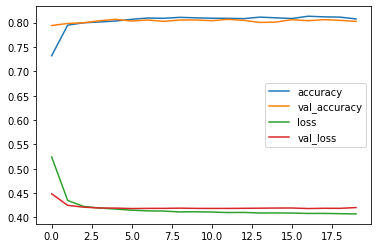

In [72]:
metrics_function[["accuracy", "val_accuracy", "loss", "val_loss"]].plot()

Sama seperti pada model sekuensial, kita dapat lihat bahwa akurasi model fungsi umumnya mengalami kenaikan dan penalti dari model terus turun selama pelatihan model.

Sekarang kita akan evaluasi bagaimana performa model pada saat diterapkan ke dalam *dataset test*.

In [73]:
loss_sequence, accuracy_sequence = model_sequence.evaluate(tf_dataset_test_batch)
loss_function, accuracy_function = model_function.evaluate(tf_dataset_test_batch)

print(f" Model loss on the test set (Sequence): {loss_sequence}")
print(f" Model accuracy on the test set (Sequence): {100 * accuracy_sequence} %")
print("--------------------------------------------------")
print(f" Model loss on the test set (Function): {loss_function}")
print(f" Model accuracy on the test set (Function): {100 * accuracy_function} %")

44/44 [==============================] - 0s 2ms/step - loss: 0.4038 - accuracy: 0.8077
 Model loss on the test set (Sequence): 0.4109650254249573
 Model accuracy on the test set (Sequence): 79.9139142036438 %
--------------------------------------------------
 Model loss on the test set (Function): 0.4038148522377014
 Model accuracy on the test set (Function): 80.7747483253479 %


Dapat kita lihat bahwa model fungsi memiliki akurasi lebih baik namun memiliki penalti yang lebih besar dibandingkan dengan model sekuensial.

Model yang kita latih masih merupakan model yang sangat sederhana. Di bagian selanjutnya kita akan memperbaiki kedua model tersebut.

### *Model Improvement*

Pada bagian ini kita akan menambahkan lapisan normalisasi batch dan dropout diantara lapisan-lapisan model yang sudah kita latih. Selain itu, kita akan membuat suatu fungsi untuk menghentikan pelatihan apabila penalti pada data validasinya mencapai minimum.

In [74]:
model_sequence_fine = keras.models.Sequential([
    keras.layers.Input(shape = preprocess_data_train.shape[1:], name = "Input"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate = 0.2),
    keras.layers.Dense(9, kernel_initializer = keras.initializers.HeNormal(seed = 13), activation = "relu", name = "HL_2"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate = 0.2),
    keras.layers.Dense(1, activation = "sigmoid", name = "Output")
])

stopper = tf.keras.callbacks.EarlyStopping(monitor = "val_loss", patience = 10)

model_sequence_fine.compile(loss = "binary_crossentropy",
              optimizer = "Adam",
              metrics = ["accuracy"])

model_sequence_fine.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 30)               120       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 30)                0         
                                                                 
 HL_2 (Dense)                (None, 9)                 279       
                                                                 
 batch_normalization_1 (Batc  (None, 9)                36        
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 9)                 0         
                                                                 
 Output (Dense)              (None, 1)                

Kemudian kita akan menambah jumlah epoch pada saat melatih model.

In [75]:
history_sequence_fine = model_sequence_fine.fit(tf_dataset_train_batch, epochs = 100, validation_data = tf_dataset_dev_batch, callbacks = stopper)

Epoch 1/100
308/308 [==============================] - 2s 3ms/step - loss: 0.6331 - accuracy: 0.6535 - val_loss: 0.4724 - val_accuracy: 0.7820
Epoch 2/100
308/308 [==============================] - 1s 3ms/step - loss: 0.4992 - accuracy: 0.7499 - val_loss: 0.4364 - val_accuracy: 0.7919
Epoch 3/100
308/308 [==============================] - 1s 3ms/step - loss: 0.4730 - accuracy: 0.7625 - val_loss: 0.4281 - val_accuracy: 0.7933
Epoch 4/100
308/308 [==============================] - 1s 3ms/step - loss: 0.4532 - accuracy: 0.7778 - val_loss: 0.4253 - val_accuracy: 0.7933
Epoch 5/100
308/308 [==============================] - 1s 3ms/step - loss: 0.4547 - accuracy: 0.7798 - val_loss: 0.4253 - val_accuracy: 0.7948
Epoch 6/100
308/308 [==============================] - 1s 3ms/step - loss: 0.4576 - accuracy: 0.7770 - val_loss: 0.4242 - val_accuracy: 0.7969
Epoch 7/100
308/308 [==============================] - 1s 3ms/step - loss: 0.4547 - accuracy: 0.7792 - val_loss: 0.4250 - val_accuracy: 0.8040

Lalu kita akan periksa bagaimana performa model tersebut.

In [76]:
metrics_sequence_fine = pd.DataFrame(history_sequence_fine.history)
metrics_sequence_fine.describe()

,loss,accuracy,val_loss,val_accuracy
count,45.000000,45.000000,45.000000,45.000000
mean,0.448195,0.782170,0.423856,0.802579
std,0.030286,0.021194,0.007860,0.004875
min,0.433206,0.653463,0.419826,0.782024
25%,0.437589,0.781637,0.421363,0.801840
50%,0.441863,0.786106,0.422375,0.803963
75%,0.446844,0.790981,0.423434,0.805379
max,0.633076,0.793622,0.472443,0.808917


Dari perintah di atas, kita dapat mengetahui bahwa rata-rata akurasi dari model adalah sebesar 78.22% dengan rata-rata akurasi validasi sebesar 80.26%, serta model memiliki penalti rata-rata sebesar 0.4481 dengan penalti rata-rata validasi sebesar 0.4239. Untuk lebih jelasnya, kita dapat membuat grafik untuk menvisualisasikan akurasi model tersebut.

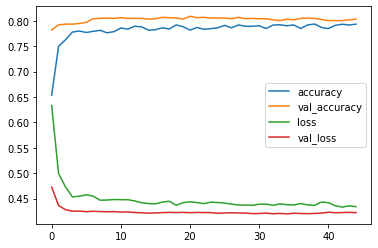

In [77]:
metrics_sequence_fine[["accuracy", "val_accuracy", "loss", "val_loss"]].plot()

Dari grafik di atas, kita dapat lihat bahwa akurasi model umumnya mengalami kenaikan dan penalti dari model terus turun selama pelatihan model. Namun, terdapat jarak antara *dataset train* dengan *dataset dev* pada model ini lebih besar dibanding dengan model dengan *hyperparameter* asal.

Selanjutnya kita akan menambahkan komponen yang sama seperti pada saat kita memperbaiki model sekuensial kepada model fungsi.

In [78]:
initial_input = keras.Input(shape = preprocess_data_train.shape[1:], name = "Input")
hidden_1 = keras.layers.BatchNormalization()(initial_input)
hidden_1 = keras.layers.Dropout(rate = 0.2)(hidden_1)
hidden_2 = keras.layers.Dense(9, kernel_initializer = keras.initializers.HeNormal(seed = 13), activation = "relu", name = "HL_2")(hidden_1)
hidden_2 = keras.layers.BatchNormalization()(hidden_2)
hidden_2 = keras.layers.Dropout(rate = 0.2)(hidden_2)
final_output = keras.layers.Dense(1, activation = "sigmoid", name = "Output")(hidden_2)
model_function_fine = keras.models.Model(inputs = [initial_input], outputs = [final_output])

model_function_fine.compile(loss = "binary_crossentropy",
              optimizer = "Adam",
              metrics = ["accuracy"])

model_function_fine.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 30)]              0         
                                                                 
 batch_normalization_2 (Batc  (None, 30)               120       
 hNormalization)                                                 
                                                                 
 dropout_2 (Dropout)         (None, 30)                0         
                                                                 
 HL_2 (Dense)                (None, 9)                 279       
                                                                 
 batch_normalization_3 (Batc  (None, 9)                36        
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 9)                 0   

Kemudian kita akan menambah jumlah epoch pada saat melatih model.

In [79]:
history_function_fine = model_function_fine.fit(tf_dataset_train_batch, epochs = 100, validation_data = tf_dataset_dev_batch, callbacks = stopper)

Epoch 1/100
308/308 [==============================] - 2s 3ms/step - loss: 0.6241 - accuracy: 0.6386 - val_loss: 0.5133 - val_accuracy: 0.7622
Epoch 2/100
308/308 [==============================] - 1s 3ms/step - loss: 0.5045 - accuracy: 0.7538 - val_loss: 0.4548 - val_accuracy: 0.7799
Epoch 3/100
308/308 [==============================] - 1s 2ms/step - loss: 0.4682 - accuracy: 0.7723 - val_loss: 0.4398 - val_accuracy: 0.7891
Epoch 4/100
308/308 [==============================] - 1s 3ms/step - loss: 0.4652 - accuracy: 0.7678 - val_loss: 0.4357 - val_accuracy: 0.7926
Epoch 5/100
308/308 [==============================] - 1s 3ms/step - loss: 0.4583 - accuracy: 0.7804 - val_loss: 0.4325 - val_accuracy: 0.7919
Epoch 6/100
308/308 [==============================] - 1s 3ms/step - loss: 0.4569 - accuracy: 0.7798 - val_loss: 0.4314 - val_accuracy: 0.7933
Epoch 7/100
308/308 [==============================] - 1s 3ms/step - loss: 0.4538 - accuracy: 0.7796 - val_loss: 0.4295 - val_accuracy: 0.7990

Lalu kita akan periksa bagaimana performa model tersebut.

In [80]:
metrics_function_fine = pd.DataFrame(history_function_fine.history)
metrics_function_fine.describe()

,loss,accuracy,val_loss,val_accuracy
count,43.000000,43.000000,43.000000,43.000000
mean,0.449782,0.780844,0.428455,0.799931
std,0.029681,0.023489,0.014429,0.007690
min,0.433849,0.638635,0.422320,0.762208
25%,0.438744,0.780723,0.423612,0.800071
50%,0.442115,0.785294,0.424588,0.801840
75%,0.449084,0.788544,0.426663,0.803255
max,0.624055,0.797075,0.513289,0.807502


Dari perintah di atas, kita dapat mengetahui bahwa rata-rata akurasi dari model adalah sebesar 78.08% dengan rata-rata akurasi validasi sebesar 79.99%, serta model memiliki penalti rata-rata sebesar 0.4497 dengan penalti rata-rata validasi sebesar 0.4284. Untuk lebih jelasnya, kita dapat membuat grafik untuk menvisualisasikan akurasi model tersebut.

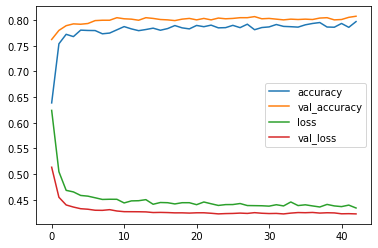

In [81]:
metrics_function_fine[["accuracy", "val_accuracy", "loss", "val_loss"]].plot()

Dari grafik di atas, kita dapat lihat bahwa akurasi model umumnya mengalami kenaikan dan penalti dari model terus turun selama pelatihan model. Namun, terdapat jarak antara *dataset train* dengan *dataset dev* pada model ini lebih besar dibanding dengan model dengan *hyperparameter* asal.

Sekarang kita akan evaluasi bagaimana performa model pada saat diterapkan ke dalam *dataset test*.

In [82]:
loss_sequence_fine, accuracy_sequence_fine = model_sequence_fine.evaluate(tf_dataset_test_batch)
loss_function_fine, accuracy_function_fine = model_function_fine.evaluate(tf_dataset_test_batch)

print(f" Model loss on the test set (Sequence Fine): {loss_sequence_fine}")
print(f" Model accuracy on the test set (Sequence Fine): {100 * accuracy_sequence_fine} %")
print("--------------------------------------------------")
print(f" Model loss on the test set (Function Fine): {loss_function_fine}")
print(f" Model accuracy on the test set (Function Fine): {100 * accuracy_function_fine} %")

44/44 [==============================] - 0s 2ms/step - loss: 0.4103 - accuracy: 0.8063
 Model loss on the test set (Sequence Fine): 0.4117211699485779
 Model accuracy on the test set (Sequence Fine): 80.48780560493469 %
--------------------------------------------------
 Model loss on the test set (Function Fine): 0.41028401255607605
 Model accuracy on the test set (Function Fine): 80.63127398490906 %


Dapat kita lihat bahwa model fungsi memiliki akurasi yang lebih baik dari model sekuensial dan juga memiliki nilai penalti yang lebih kecil dibanding model sekuensial. Selain itu, kita dapat melihat bahwa penalti pada model yang sudah diperbaiki justru malah menjadi lebih besar dibanding model dengan *hyperparameter default*, serta akurasi model yang sudah diperbaiki justru menjadi lebih buruk pada model fungsi.

## Model Inference

Sebelum kita melakukan *inference*, kita akan lakukan pemecahan kolom dan mengurus *missing value* pada *dataset inference* yang kita miliki.

In [83]:
phone_serv_bool = []
single_line_bool = []
multi_line_bool = []
internet_serv_bool = []
DSL_serv_bool = []
optic_serv_bool = []
olsecurity_serv_bool = []
olbackup_serv_bool = []
devprotect_serv_bool = []
techsupport_serv_bool = []
tv_serv_bool = []
movies_serv_bool = []

for i in range(len(df_inf)):
  if "Yes" in df_inf.PhoneService.iloc[i]:
    phoneserv_id = True
  else:
    phoneserv_id = False
  phone_serv_bool.append(phoneserv_id)

for i in range(len(df_inf)):
  if "Yes" in df_inf.MultipleLines.iloc[i]:
    singleline_id = True
  else:
    singleline_id = False
  single_line_bool.append(singleline_id)

for i in range(len(df_inf)):
  if "Yes" in df_inf.MultipleLines.iloc[i]:
    multiline_id = True
  else:
    multiline_id = False
  multi_line_bool.append(multiline_id)

for i in range(len(df_inf)):
  if "No" in df_inf.InternetService.iloc[i]:
    netserv_id = True
  else:
    netserv_id = False
  internet_serv_bool.append(netserv_id)

for i in range(len(df_inf)):
  if "DSL" in df_inf.InternetService.iloc[i]:
    dslserv_id = True
  else:
    dslserv_id = False
  DSL_serv_bool.append(dslserv_id)

for i in range(len(df_inf)):
  if "Fiber optic" in df_inf.InternetService.iloc[i]:
    opticserv_id = True
  else:
    opticserv_id = False
  optic_serv_bool.append(opticserv_id)

for i in range(len(df_inf)):
  if "Yes" in df_inf.OnlineSecurity.iloc[i]:
    olsec_id = True
  else:
    olsec_id = False
  olsecurity_serv_bool.append(olsec_id)

for i in range(len(df_inf)):
  if "Yes" in df_inf.OnlineBackup.iloc[i]:
    olback_id = True
  else:
    olback_id = False
  olbackup_serv_bool.append(olback_id)

for i in range(len(df_inf)):
  if "Yes" in df_inf.DeviceProtection.iloc[i]:
    devprot_id = True
  else:
    devprot_id = False
  devprotect_serv_bool.append(devprot_id)

for i in range(len(df_inf)):
  if "Yes" in df_inf.TechSupport.iloc[i]:
    techsupp_id = True
  else:
    techsupp_id = False
  techsupport_serv_bool.append(techsupp_id)

for i in range(len(df_inf)):
  if "Yes" in df_inf.StreamingTV.iloc[i]:
    tv_id = True
  else:
    tv_id = False
  tv_serv_bool.append(tv_id)

for i in range(len(df_inf)):
  if "Yes" in df_inf.StreamingMovies.iloc[i]:
    movies_id = True
  else:
    movies_id = False
  movies_serv_bool.append(movies_id)

df_inf["PhoneUser"] = phone_serv_bool
df_inf["SingleLineUser"] = single_line_bool
df_inf["MultiLineUser"] = multi_line_bool
df_inf["InternetUser"] = internet_serv_bool
df_inf["DSLUser"] = DSL_serv_bool
df_inf["FiberOpticUser"] = optic_serv_bool
df_inf["OnlineSecurityUser"] = olsecurity_serv_bool
df_inf["OnlineBackupUser"] = olbackup_serv_bool
df_inf["DeviceProtectionUser"] = devprotect_serv_bool
df_inf["TechSupportUser"] = techsupport_serv_bool
df_inf["TVStreamUser"] = tv_serv_bool
df_inf["MoviesStreamUser"] = movies_serv_bool

df_inf.TotalCharges = df_inf.TotalCharges.fillna(df_inf.TotalCharges.median())

Lalu kita akan lakukan *scaling* dan *encoding* pada fitur dan target yang sudah kita pilih.

In [84]:
preprocess_data_inf = preprocess_pipeline.transform(df_inf)
y_inf = label_encoder.transform(df_inf.Churn)

Lalu kita akan prediksi target pada *data inference* dengan nilai aslinya (dengan 0 = False dan 1 = True) dengan menggunakan model fungsi dengan *hyperparameter default*

In [87]:
y_inf_pred_inf_function = model_function.predict(preprocess_data_inf)

y_inf_df = pd.DataFrame(y_inf, columns = ["RealChurn"])
y_inf_pred_inf_function_df = pd.DataFrame(y_inf_pred_inf_function, columns = ["PredChurn"]).round(decimals = 0)

pd.concat([y_inf_df, y_inf_pred_inf_function_df], axis = 1)

,RealChurn,PredChurn
0,0,0.0
1,0,0.0
2,1,0.0
3,0,0.0
4,0,0.0
5,0,0.0
6,0,0.0
7,1,1.0
8,1,1.0
9,0,0.0


Dapat kita lihat bahwa hasil prediksi pada *dataset inference* mengeluarkan 9 hasil benar dan 1 hasil salah. Apabila dihitung akurasinya adalah sebesar 90%.

## Kesimpulan

Berikut adalah beberapa hal yang dapat kita simpulkan dari analisis yang sudah dibuat:

* Berdasarkan EDA, kita ketahui bahwa data yang digunakan merupakan data pelanggan layanan telekomunikasi dengan berbagai macam detil data diri dan pelayanan yang digunakan oleh 7043 pelanggan yang tercatat di dalam data,

* Model-model yang sudah dilatih umumnya memiliki nilai akurasi dan penalti yang sama, namun dapat diketahui bahwa model fungsi dengan *hyperparameter default* merupakan model terbaik untuk digunakan pada *dataset* ini dengan akurasi sebesar 80.77% dan nilai penalti sebesar 0.4038,

## Tambahan: Menyimpan Model untuk *Deployment*

Perintah di bawah digunakan untuk mengambil model yang akan digunakan untuk *deployment*. Model yang akan digunakan merupakan model sekuensial dengan *hyperparameter* default.

In [88]:
with open("preprocess_p2m1.pkl", "wb") as pipe_preprocess:
    pickle.dump(preprocess_pipeline, pipe_preprocess)

model_function_fine.save("model_p2m1")

! zip -r model_p2m1.zip model_p2m1

  adding: model_p2m1/ (stored 0%)
  adding: model_p2m1/saved_model.pb (deflated 88%)
  adding: model_p2m1/keras_metadata.pb (deflated 89%)
  adding: model_p2m1/variables/ (stored 0%)
  adding: model_p2m1/variables/variables.index (deflated 66%)
  adding: model_p2m1/variables/variables.data-00000-of-00001 (deflated 52%)
  adding: model_p2m1/assets/ (stored 0%)
